In [4]:
from LHEImport.LHEImport import LHEImport as LHEI
import pandas as pd
import matplotlib.pyplot as plt

# t t~

In [2]:
numcollisions = 10
particles = []

# index = 0
for i in range(0,numcollisions):
    event, final_particles, init = LHEI('event_files/ttZ_run01.lhe',i).parse()
    for j in range(0, len(final_particles)):
        final_particles[j].__dict__['collision'] = i
  #      np[j].__dict__['index'] = index
        particles.append(final_particles[j].__dict__)
  #      index += 1

df = pd.DataFrame(particles)
df.keys()
tbars =df[df['pdgid'] == -6]
tbars[['px', 'py', 'pz', 'energy']]

TypeError: __init__() takes 2 positional arguments but 3 were given

In [3]:
plt.hist(tbars['energy'])
plt.xlabel('Energy GeV')
plt.show()

NameError: name 'tbars' is not defined

# ttZ

In [4]:
numcollisions = 100
ttz_particles = []


# index = 0
for i in range(0,numcollisions):
    event, final_particles = LHEI('event_files/ttZ_events.lhe',i).parse()
    for j in range(0, len(final_particles)):
        final_particles[j].__dict__['collision'] = i
  #      np[j].__dict__['index'] = index
        ttz_particles.append(final_particles[j].__dict__)
  #      index += 1

df = pd.DataFrame(ttz_particles)
tbars =df[df['pdgid'] == -6]
tbars[['px', 'py', 'pz', 'energy']]


TypeError: __init__() takes 2 positional arguments but 3 were given

In [5]:
plt.hist(tbars['energy'])
plt.show()

NameError: name 'tbars' is not defined

Determining the init block

In [6]:
from os import listdir
from os.path import isfile, join

onlyfiles = [join('event_files/',f) for f in listdir('event_files/') if isfile(join('event_files/',f))]
print(onlyfiles)



['event_files/ttZ_run01.lhe', 'event_files/ttZ_run02.lhe', 'event_files/ttZ_run03.lhe', 'event_files/tt_events.lhe', 'event_files/Untitled.ipynb']


In [7]:
rows = []
for file in onlyfiles: 
    a,b,init = LHEI(file).parse()
    init['file']=file
    rows.append(init)
    
init_data = pd.DataFrame(rows)
init_data

AttributeError: 'LHEImport' object has no attribute 'parse'

In [19]:
data = LHEI('event_files/ttZ_run01.lhe')
Data= data.importevents(limit_events=True)

In [24]:
rows = []
print(len(Data['eventdata']))

98


In [35]:
for i in range(0, len(Data['eventdata'])):
    particles = Data['eventdata'][i]['final_particles']
    for particle in particles:
        rows.append(particle.__dict__)
df2 = pd.DataFrame(rows)
df2

,barcode,pdgid,status,pt,eta,phi,px,py,pz,energy,mass
0,1,21,-1,0.000000,inf,0.000000,0.000000,0.000000,57.236659,57.236659,0.000
1,2,21,-1,0.000000,-inf,0.000000,-0.000000,-0.000000,-2996.445353,2996.445353,0.000
2,3,6,1,203.168677,-1.554223,-0.778096,-144.707147,-142.609091,-459.166812,531.075016,173.000
3,4,-6,1,132.233154,-3.382420,1.467611,-13.620293,131.529824,-1944.353348,1956.508254,173.000
4,5,23,1,158.714613,-1.930849,0.069863,158.327440,11.079267,-535.688534,566.098741,91.188
...,...,...,...,...,...,...,...,...,...,...,...
3425,1,21,-1,0.000000,inf,0.000000,0.000000,0.000000,224.620616,224.620616,0.000
3426,2,21,-1,0.000000,-inf,0.000000,-0.000000,-0.000000,-388.158729,388.158729,0.000
3427,3,6,1,78.096114,1.074084,-0.987887,42.988385,-65.199706,100.966535,214.993591,173.000
3428,4,-6,1,20.891285,-2.262471,0.905633,-12.893846,16.437594,-99.261894,200.545180,173.000


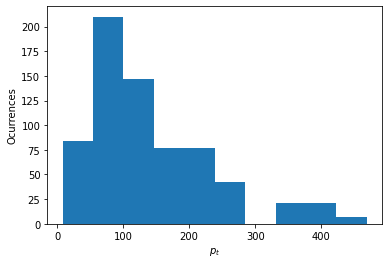

In [45]:
# z total momentum
plt.hist(df2[(df2.pdgid==23)].pt)
plt.xlabel('$p_t$')
plt.ylabel('Ocurrences')
plt.show()

In [10]:
df1 = pd.DataFrame(Data['stats'], index=[0])
df2 = pd.DataFrame(Data['eventdata'][1]['final_particles'])
df2

,0
0,"Particle 1, PDGID2"
1,"Particle 2, PDGID-2"
2,"Particle 3, PDGID6"
3,"Particle 4, PDGID-6"
4,"Particle 5, PDGID23"
